In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

# Ice Cream production data

In [3]:
df_ice_cream = pd.read_csv('ice_cream.csv')
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [5]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream['date'])

In [6]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [7]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

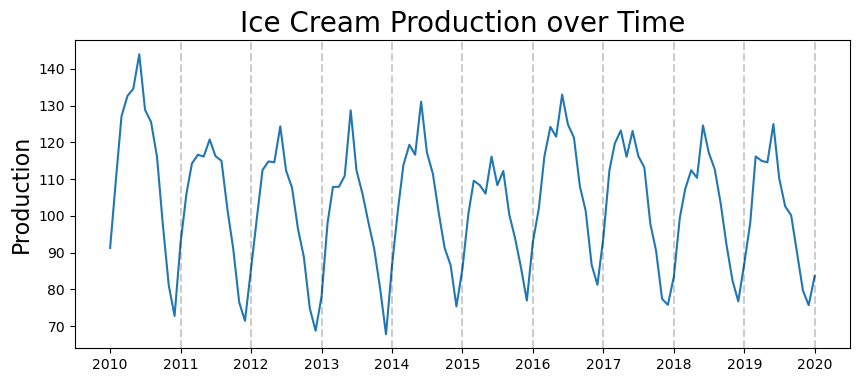

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream['production'])
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)

for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

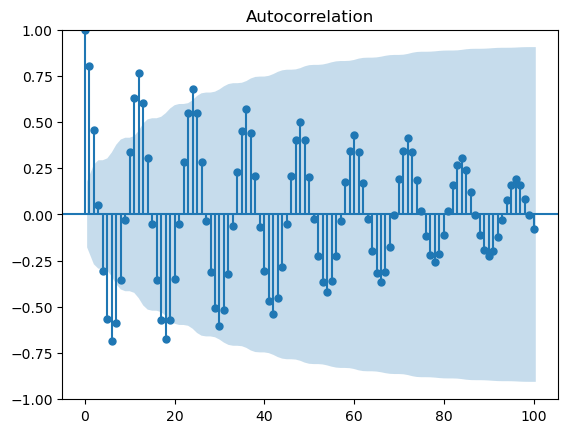

In [9]:

acf_plot = plot_acf(df_ice_cream['production'], lags=100)

# PACF

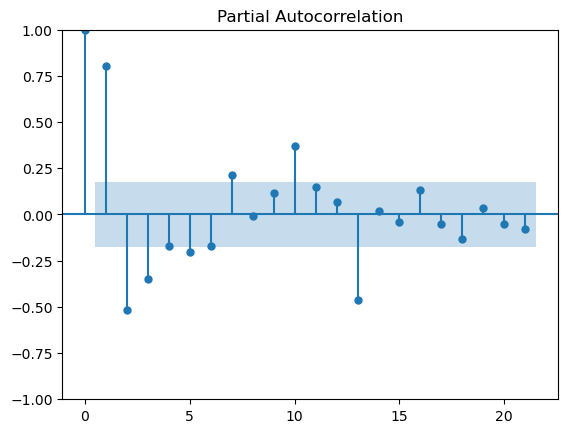

In [10]:
pacf_plot = plot_pacf(df_ice_cream['production'], method='ywm')

In [11]:
import yfinance as yf

In [38]:
#define the ticker symbol
tickerSymbol = 'EA'

In [39]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [40]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [41]:
tickerDf = tickerDf[['Close']]

In [42]:
#see your data
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,46.313450
2015-01-05 00:00:00-05:00,46.017017
2015-01-06 00:00:00-05:00,45.414249
2015-01-07 00:00:00-05:00,46.254166
2015-01-08 00:00:00-05:00,47.558487


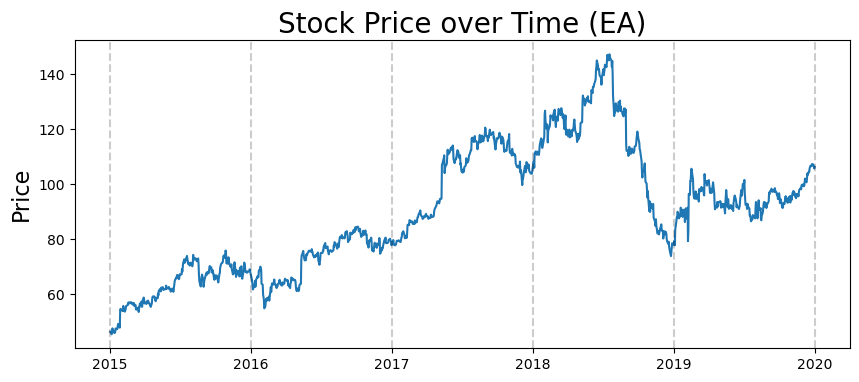

In [43]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf['Close'])
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [44]:
#take first difference
first_diffs = tickerDf['Close'].values[1:] - tickerDf['Close'].values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [45]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [46]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,46.313450,-0.296432
2015-01-05 00:00:00-05:00,46.017017,-0.602768
2015-01-06 00:00:00-05:00,45.414249,0.839916
2015-01-07 00:00:00-05:00,46.254166,1.304321
2015-01-08 00:00:00-05:00,47.558487,-0.612637


In [47]:
tickerDf.tail()

,Close,FirstDifference
Date,,
2019-12-24 00:00:00-05:00,107.261047,-0.039520
2019-12-26 00:00:00-05:00,107.221527,-0.079056
2019-12-27 00:00:00-05:00,107.142471,-1.482185
2019-12-30 00:00:00-05:00,105.660286,0.573097
2019-12-31 00:00:00-05:00,106.233383,0.000000


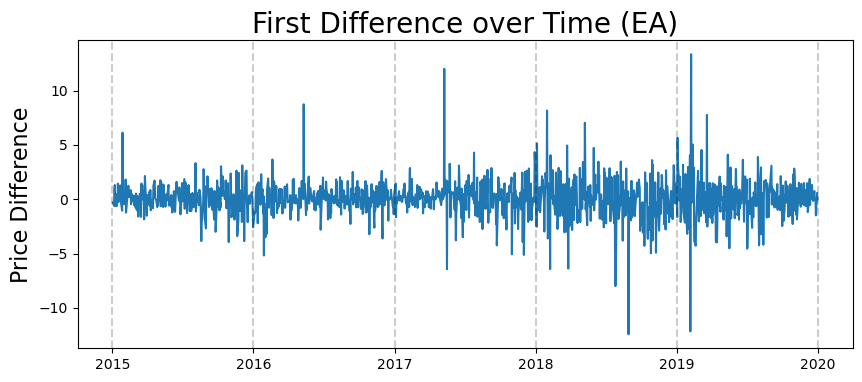

In [48]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf['FirstDifference'])
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

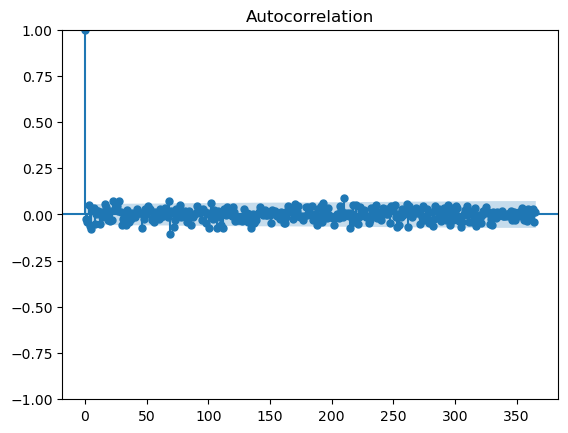

In [51]:
acf_plot = plot_acf(tickerDf.FirstDifference, lags=365)


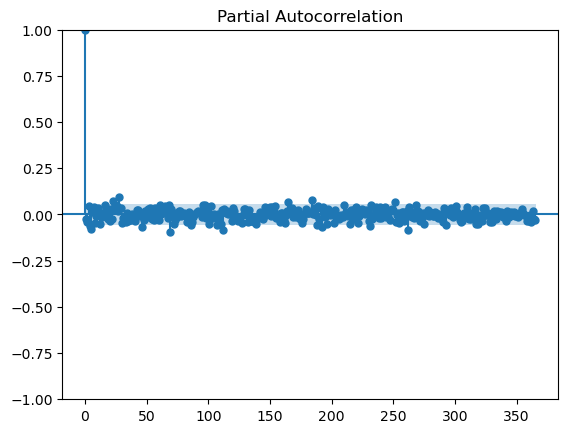

In [52]:
pacf_plot = plot_pacf(tickerDf.FirstDifference, method='ywm', lags=365)